# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [2]:
pip install tensorflow


The following command must be run outside of the IPython shell:

    $ pip install tensorflow

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


In [3]:
import os
os.environ['KERAS_BACKEND']='theano'

In [4]:
pip install theano


The following command must be run outside of the IPython shell:

    $ pip install theano

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


In [5]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using Theano backend.


In [6]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11493376/11490434 [==============================] - 6s 1us/step


In [7]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [8]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [9]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#建立模型

In [11]:
#宣告採用序列模型
model = Sequential()

In [31]:
#建構輸入層
model.add(Dense(units=512, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [32]:
model.add(Dense(5))

In [33]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [34]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
dense_4 (Dense)              (None, 512)               5632      
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 512)              

/Users/jiangzhihao/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


# 訓練模型

In [36]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [37]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 48s 993us/step - loss: 2.3015 - accuracy: 0.1130 - val_loss: 2.3026 - val_accuracy: 0.1060
Epoch 2/10
48000/48000 [==============================] - 56s 1ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3022 - val_accuracy: 0.1060
Epoch 3/10
48000/48000 [==============================] - 67s 1ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 4/10
48000/48000 [==============================] - 113s 2ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 5/10
48000/48000 [==============================] - 82s 2ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 6/10
48000/48000 [==============================] - 93s 2ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 7/10
48000/48000 [==============================] - 96s 2ms

# 以圖形顯示訓練過程

In [38]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [42]:
show_train_history(train_history,'acc','val_acc')


KeyError: 'acc'

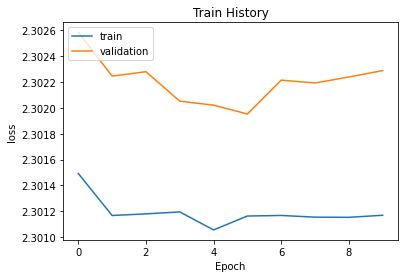

In [40]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [41]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 2s 172us/step

accuracy= 0.11349999904632568
